The purpose of this notebook is to discuss parameter estimation of fat-tailed probability distributions. Specifically, we want to focus on arguing that the fat-tailed probability distributions are not 'unknowable', and one can estimate their paramaters by choosing well-defined observables and measuring their values.

As a concrete example we will be dealing with the Cauchy distribution. The Cauchy distribution is known in physics as the Breit-Wigner distribution, and it describes resonance of a given energy and life-time. 

Interestingly, it does not have a well-defined mean: it is so much 'fat-tailed' that it does not decay fast enough in the asymptotic region *even* for the mean value integral to converge. Similarly, the higher moments (defining dispersion, etc.) of the Cauchy/Breit-Wigner distribution are undefined as well.

The question then arises how should one estimate parameters (e.g., the energy and the life-time of the resonance) of the Cauchy (Breit-Wigner) distribution. Since we know that the mean, dispersion, and higher moments are not good observables for fat-tailed distributions in general, we should *not* be measuring the values of those ill-defined observables from the samples, and we should not be attempting to estimate paremeters of the distribution from those values. Indeed, central limit theorem will *not* ensure that such sample means would be good estimates of the parameters of the distribution. That is, the accuracy of the estimate will not be controlled by the size of the sample.

However one can easily demonstrate that by carrying out simple change of variables one can re-define Cauchy distribution in terms of a different distribution with well-defined mean and standard deviation, which allows one to calculate parameters of the Cauchy distribution, and compare them with the corresponding experimentally measureed sample values. This is what we will demonstrate explicitly in this notebook.

In other words, one can define well-defined observables, which have finite expectation values. Therefore due to the central-limit theorem measurement of those observables will allow us to have a good estimate of parameters of the underlying probability distribution, which becomes more and more sharp as the sample size increases. This is physically important, because parameters of the probability distribution usually have physical meaning (such as observable energy and life-time in case of the Breit-Wigner distribution), and therefore should be measurable in principle.

We will consider an example in which the change of variables results in a different "fat-tailed" power-law distribution, which decays faster in the asymptotic region, thereby allowing calculation of the mean and standard deviation. This is by no means the only possible change of variables but simply an example used for illustration purposes (one could have equally well obtained exponentially decaying probability distribution, in which case *all* of the moments would be well-defined, not only the first few).

Begin by importing the necessary libraries

In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

Using numpy library we can generate pseudo-random variable $y$ with the Cauchy distribution $$f(y\,|\,x_0=0,\gamma=1) = \frac{1}{\pi}\frac{1}{y^2 + 1}.$$ Then another random variable $x$ defined as $x = x_0+\gamma\, y$ satisfies general Cauchy distribution $$f(x\,|\,x_0,\gamma) = \frac{\gamma}{\pi}\frac{1}{(x-x_0)^2 + \gamma^2}.$$

Let us define the corresponding Python function which returns pseudo-random variable with a general Cauchy distribution with parameters $x_0, \gamma$ as

In [2]:
def cauchyDistribution(x0, gamma):
    return x0 + gamma * np.random.standard_cauchy()

If random variable $x\in (-\infty,\infty)$ has Cauchy distribution with parameters $x_0, \gamma$, let us define a new random variable $z=|x|^{1/4} \in [0,\infty)$. A standard calculation gives its probability distribution as
$$g(z)=\frac{4\gamma}{\pi}\,z^3\,\left(\frac{1}{(z^4-x_0)^2+\gamma^2}+\frac{1}{(z^4+x_0)^2+\gamma^2}\right)\,.$$
Notice that $z$ has well-defined mean and standard deviation. In fact, the first three moments of this distribution are well-defined:
$$\langle z^n \rangle = \int _0^\infty dz\, g(z)\,z^n\,,\qquad n \leq 3\,.$$
We can demonstrate this nice behavior explicitly. First of all define the function which numerlcally calculates the moments of the distribution:

In [3]:
def moment(n):
    return integrate.quad(lambda z: 4 * (gamma / np.pi) * z ** (n + 3) * (1 / ((z ** 4 - x0) ** 2 + gamma ** 2) + 1 / ((z ** 4 + x0) ** 2 + gamma ** 2)), 0, 1000)

Let us first pick some parameters of the Cauchy distribution

In [4]:
x0 = 2.34
gamma= 5.67

We will store the first two moments (the mean and the mean of the squared random variable) in the arrays:

In [5]:
means = []
secondMoments = []

Let us collect 100 values of the first two moments, where each pair of moments is calculated for sample of 100000 entries. Notice that we sample $x$ from the Cauchy distribution with the given parameters $x_0,\gamma$ but store the values of 
$$z=x^{1/4}\,,\qquad z^2=x^{1/2}$$

In [6]:
for _ in range(100):
    s1 = []
    s2 = []
    for _ in range(100000):
        d = abs(cauchyDistribution(x0,gamma))
        s1 += [d ** 0.25]
        s2 += [d ** 0.5]
    means += [np.mean(s1)]
    secondMoments += [np.mean(s2)]

Notice that since the mean and standard deviation of $z$ are well-defined, their estimates are converging well, as expected due to the central limit theorem. Let's plot those sample values explicitly

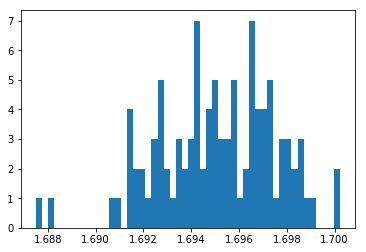

In [7]:
plt.hist(means,bins=50)
plt.show()

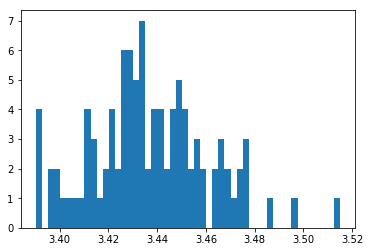

In [8]:
plt.hist(secondMoments,bins=50)
plt.show()

The estimates themselves are given by

In [9]:
print "Mean = {}, Second Moment = {}".format(np.mean(means), np.mean(secondMoments))

Mean = 1.6950896284, Second Moment = 3.43683342424


Notice that these agree very well with their analytical values

In [10]:
print "Analytical Mean = {}, Analytical Second Moment = {}".format(moment(1)[0], moment(2)[0])

Analytical Mean = 1.69525881468, Analytical Second Moment = 3.43567048915
